比賽簡介: 
參加的是Kaggle中的Store sales-Time series forcasting，

為甚麼參加這個比賽:
起先是因為它在"getting start"中，並且它的東西類似上課教的資料分析並進行機器學習模型，數值預測，類似於房價預測跟鐵達尼號的生存預測

資料集、目標介紹:
資料集放在另一個資料夾中的data。自己在程式上還算是個初學者，希望透過一次次的練習能夠學到更多的東西，而希望自己在這個比賽中能夠順利進行資料分析並預測結果建立機器學習模型

實作:

先載入需要的模組－pandas、numpy、matplotlib.pyplot、seaborn、plotly.express

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1.讀取holidays_event的資料，並了解holidays_event的內容

2.用seaborn畫date、type、descripyion的資料分布

3.利用groupby了解locale_name、type、locale和transferred之間是否有關連性

4.統計locale_name、type、locale資料內的數據

5.確認holidays_events是否有缺失值，確認發現holidays_events並沒有缺失值，先繼續讀取其他數據

In [ ]:
#1.
holidays_events = pd.read_csv("data/holidays_events.csv")
holidays_events.head()
holidays_events.info()
holidays_events.describe().T

In [ ]:
#2.
sns.displot(holidays_events['date'])
sns.displot(holidays_events['type'])
sns.displot(holidays_events['description'])

In [ ]:
#3.
holidays_events.groupby('locale_name').mean()
holidays_events.groupby('type').mean()
holidays_events.groupby('locale').mean()

In [ ]:
#4.
holidays_events['locale_name'].value_counts()
holidays_events['type'].value_counts()
holidays_events['locale'].value_counts()

In [ ]:
#5.
holidays_events.isnull().sum()

1.讀取oil的數據，分析並觀察它的資料型態跟資料內容

2.用seaborn畫dcoilwtico的圖，了解dcoilwtico的數值分布

3.確認是否有缺失值－發現到dcoilwtico有缺失值43個，想試著用fillna的ffill去填補數值，但發現填補失敗，info()中還是發現dcoilwtico的遺漏值有43個，試過刪掉遺漏值但也失敗，先行將其放著並讀取其他資料

4.引用網路上同個比賽的"BOWLOFRUITS"發表的code上畫的圖，plotly.express可以讓游標放在圖上任意點都可以看到數值，藉此我們可知再任意時間點的油價

In [ ]:
#1.
oil = pd.read_csv("data/oil.csv")
oil.head()
oil.info()
oil.describe().T

In [ ]:
#2.
sns.displot(oil['dcoilwtico'])

In [ ]:
#3.
oil.isnull().sum()
oil.fillna(method='ffill')
oil.info()

In [ ]:
#4.
fig = px.scatter(oil, x = oil.index, y ='dcoilwtico', title='Oil price change over the year')
fig.update_xaxes(rangeslider_visible = False,)

1.讀取stores的數據，分析並觀察它的資料型態跟資料內容

2.用seaborn畫city、state、cluster、type的圖，了解他們的數值資料分布

3.利用groupby了解city、state和store_nbr、cluster之間是否有關連性

4.統計city、state、type資料內的數據

5.確認是否有缺失值－沒有，讀取下一個資料

In [ ]:
#1.
stores = pd.read_csv("data/stores.csv")
stores.head()
stores.info()

In [ ]:
#2.
sns.displot(stores['city'])
sns.displot(stores['state'])
sns.displot(stores['cluster'])
sns.displot(stores['type'])

In [ ]:
#3.
stores.groupby('city').mean()
stores.groupby('state').mean()

In [ ]:
#4.
stores['city'].value_counts()
stores['state'].value_counts()
stores['type'].value_counts()

In [ ]:
#5.
stores.isnull().sum()

1.讀取train的資料，並了解資料內容

2.用seaborn畫onpromotion的資料分布，並比較store_nbr、onpromotion之間的關聯

3,確認train是否有缺失值，確認發現train並沒有缺失值，先繼續讀取其他數據

4.利用groupby了解family和id、store_nbr、sales、onpromotion之間是否有關連性，接著將family的資料畫成bar形式的統計圖，了解family每一個資料的數值多寡分布


In [ ]:
#1.
train = pd.read_csv("data/train.csv")
train.head()
train.info()
train.describe().T

In [ ]:
#2.
sns.displot(train['onpromotion'])
sns.pairplot(train[['store_nbr','onpromotion']],dropna=True)

In [ ]:
#3.
train.isnull().sum()

In [ ]:
#4.
train.groupby('family').mean()
train.groupby(['family']).sales.median().plot(kind='bar')

1.讀取transactions的資料，並了解資料內容

2.用seaborn畫store_nbr、transactions的資料分布，並比較store_nbr、transactions之間的關聯

3,確認transactions是否有缺失值，確認發現transactions並沒有缺失值，先繼續讀取其他數據

4.利用groupby了解store_nbr和transactions之間是否有關連性

In [2]:
#1.
transactions = pd.read_csv("data/transactions.csv")
transactions.head()
transactions.info()
transactions.describe().T

In [3]:
#2.
sns.displot(transactions['store_nbr'])
sns.displot(transactions['transactions'])
sns.pairplot(transactions[['store_nbr','transactions']],dropna=True)

In [ ]:
#3.
transactions.isnull().mean()

In [ ]:
#4.
transactions.groupby('store_nbr').mean()

接下來進行資料的整合
1.將train的資料和stores的資料整合變成新檔－new_train

2.參考同比賽當中的"BOWLOFRUITS"發表的code
將holidays_event當中的local、Regional、National的欄位和new_train整合，但整合多了locale_x，locale_name_x，description_x，locale_y，locale_name_y，description_y，刪掉這些並也將我認為不重要的locale刪掉

3.將new_train的資料和oil的資料整合

4.將new_train的資料和transactions的資料整合，且使用apply函數lamda將transactions的值作為功能輸入函數，並讓它可以獨立在其他位置使用

5.因為new_train當中的date資料型態是object，所以想利用pd.to_datetime將其型態轉變

In [ ]:
#1.
new_train = train.merge(stores, on="store_nbr", how="left")
new_train.head()

In [ ]:
#2.
holidays_events.rename(columns={"type": "holiday"}, inplace=True)
Local = holidays_events[holidays_events.locale == "Local"]
Regional = holidays_events[holidays_events.locale == "Regional"]
National = holidays_events[holidays_events.locale == "National"]
new_train = new_train.merge(National, on='date', how='left')
new_train = new_train.merge(Regional,left_on=['date','state'], right_on=['date','locale_name'], how='left')
new_train = new_train.merge(Local, left_on=['date','city'], right_on=['date','locale_name'], how='left')
new_train.drop(columns=["locale_x", "locale_name_x", "description_x", "locale_y", "locale_name_y", "description_y", "locale", "locale_name", "description"], inplace=True)
new_train.head()

In [ ]:
#3.
new_train = new_train.merge(oil, on='date', how='left')
new_train.head()

In [ ]:
#4.
new_train = new_train.merge(transactions, on=['date','store_nbr'], how='left')
new_train["transactions"] = new_train.apply(lambda x: 0 if pd.isna(x.transactions) else x.transactions, axis=1)
new_train.head()

In [ ]:
#5.
new_train['date'] = pd.to_datetime(new_train['date'])
new_train = new_train.set_index('date')
new_train.head()

引用網路上同個比賽的"BOWLOFRUITS"發表的code

假設數據採樣的頻率是每年，從此周期圖中，我們可以看到每雙週的數據非常高，推測可能是因為這份資料的收入是雙週支付的，但同時我們也看到每年和每月的數據也不低。

In [ ]:
def plot_periodogram(ts):
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    
    from scipy.signal import periodogram
    frequencies, spectrum = periodogram(ts, fs=fs, detrend="linear", window="boxcar", scaling="spectrum")
    
    _, ax = plt.subplots()
    ax.step(frequencies, spectrum)
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(["Annual (1)", "Semiannual (2)", "Quarterly(4)", "Bimonthly (6)", "Monthly (12)", "Biweekly (26)", "Weekly (52)", "Semiweekly (104)"], rotation=30)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
     
    return ax

avg_sales = train.set_index("date").groupby("date").sales.mean()
plot_periodogram(avg_sales)

接下來要進行主要的機器學習部分，實際成果並沒有成功，
先設X，y ，再利用train_test_spilt，取0.3的test_size，random_state=57
再用Ridge試著畫圖，但實際結果跑不出來

In [ ]:
X = new_train.iloc[:,3:11]
y = new_train['holiday']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)
from sklearn.linear_model import Ridge
lr = Ridge
lr.fit(X_train, y_train)

與上課內容的關聯性、延伸學習:

我認為這個比賽與上課內容最相關的地方是在讀取比賽的資料和分析，因為這個比賽的資料有很多，一開始不知道從哪裡下手時，參考了很多已經上傳到比賽中其他人的程式碼，但最後還是先從期中前上課教到的資料分析與統整的地方下手，發現一把資料整理一下、觀察資料就比較知道資料該怎麼運行。

不過在這個比賽中，除了分析資料以外，我認為最重要的一步應該是統合資料，因為比賽給的資料實在太多，每一筆資料又有每一筆資料的關聯性，所以
我也去學習怎麼資料統整，一步一步把所有資料全都合併在一起，當看到資料成功並在一起的喜悅實在難以言喻，我也學到利用pandas的merge跟了解到concat這兩個方法的運用，因為一開始我是用concat做，但發現整合的方式跟結果很奇怪，最後查找往物才發現merge，結果就成功了。不僅如此，在分析資料的時候常常需要畫圖來了解到資料的內容和分布，我在做oil的圖時，原本是用簡單的seabor的displot畫圖，但我在看其他人上傳的程式碼時，發現"BOWLOFRUITS"這個人發表的code中，他的oil的資料圖是利用"plotly.express.scatter"畫的並發現這個東西可以用鼠標指向圖上的任意點並知道該點的數值，雖然這個對於後面的機器學習作用並不大，畢竟他只是統計資料和展現每一點的數值，但我覺得可以從這當中學習到不同的程式運用也是不錯的成長。

比賽結果、修正與改善，嘗試與結果分析:
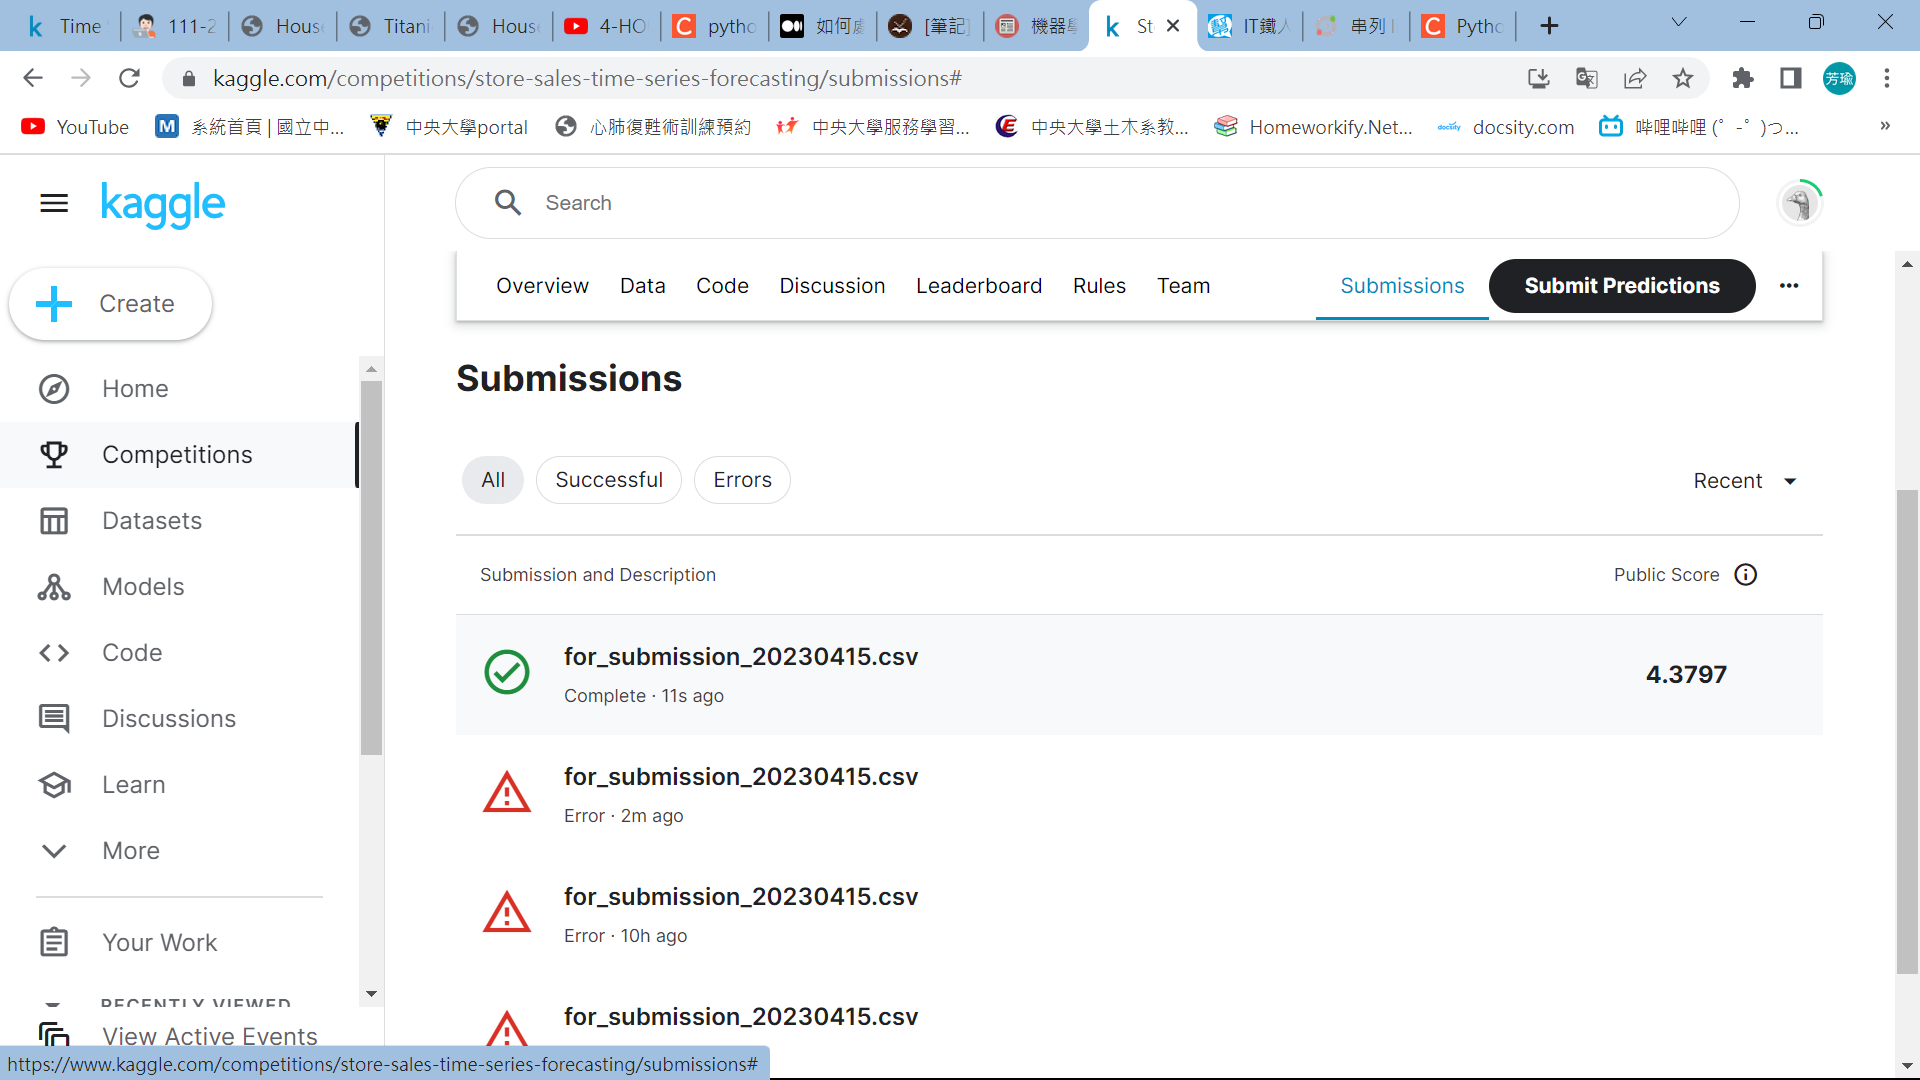

以上為我的比賽結果，很意外的我獲得了4.3797分，但我想我是因為湊出了比賽要上傳的檔案才得到的分數，因為我在後面的機器學習模型卡關了，參考網路上的內容實在是看不懂所以也不太適合引用，但自己練習打出來的成果卻又不成功，嘗試了sklearn的幾種方法後最後還是放棄了，所以這次的比賽我只做到資料分析與整合、填補資料的部分也嘗試了不同種方法(從將遺漏值刪除，到平均數值填補，再到用fillna的ffill)也還是失敗了，最後的模型也沒有建立成功，我想我要修改的地方還有很多，我認為我首要目標修正是將遺漏值補齊，再將機器學習模型做出來，到那時候再試著將模型做的完善一點。

但我想我可以利用做的資料整合來分析與探討一下成果。

In [ ]:
#1.
new_train.groupby('store_nbr').transactions.median().plot(kind='bar')
#2.
new_train.groupby('store_nbr').sales.median().plot(kind='bar')
#3.
new_train.groupby('family').onpromotion.median().plot(kind='bar')
#4.
new_train.groupby('family').sales.median().plot(kind='bar')

從上面的code可以看出一些關係:
例如
我們可以從1.看出store_nbr和transactions之間的關係，在store_nbr=44的時候有最大的transactions，可以推測在store_nbr-44做的交易最多，銷量應該最好，也從2.看出果然store_nbr-44的銷量很好

再看3.，我們可以發現Grocery 1的onpromotion最高，因為很常在做促銷，推測Grocery 1的sales應該最高，從4.看出，果然Grocery1的sales最高，如同我們的推測。

結論:
雖然我在最後沒能如預期完成機器學習的部分，但在最後還是有到資料整合，可以從其之中推測出不同欄位與不同欄位的關係，也學到了很多不同的程式用法，學到了很多新的模組，縱使成果不如預期，我相信學到的東西能夠讓我在未來其他運用上獲益良多，也期許自己能夠在下半學期多多精進機器學習的部分。